In [ ]:
!pip install metpy
!pip install siphon

from datetime import datetime

import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units, pandas_dataframe_to_unit_arrays
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [4]:
# Set date that you want
# Data goes back to the 1970's
date = datetime(2017, 6, 29, 12)

# Set station ID, there are different stations back in the day
# Current station IDs found at http://weather.rap.ucar.edu/upper
station = 'SBFL'

# Use Siphon module to grab data from remote server
df = WyomingUpperAir.request_data(date, station)

In [5]:
# Create dictionary of unit arrays
data = pandas_dataframe_to_unit_arrays(df)

# Isolate united arrays from dictionary to individual variables
p = data['pressure']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']

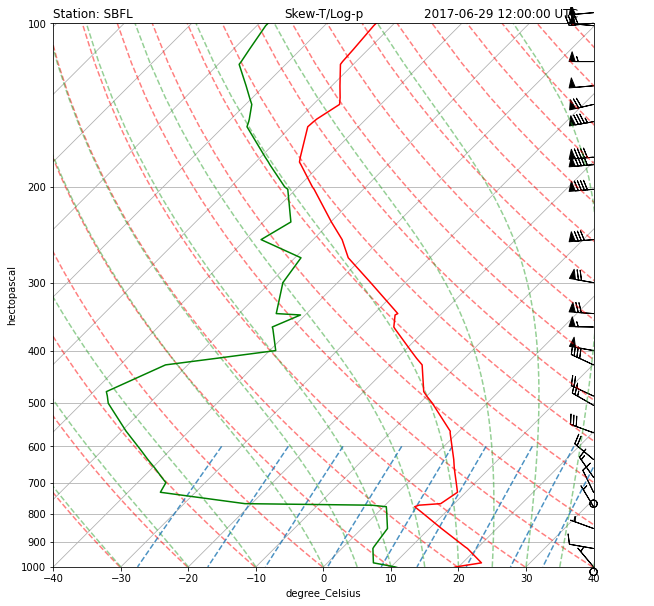

In [6]:

# Plot a skew-T image

fig = plt.figure(figsize=(10, 10))

skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

# Plot wind barbs, skipping every other one
skew.plot_barbs(p[::2], u[::2], v[::2], y_clip_radius=0.03)

# Set sensible axis limits
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 40)

# Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233,555,10)*units.K)
skew.plot_moist_adiabats(color='tab:green')
skew.plot_mixing_lines(color='tab:blue')

# Plot some titles
plt.title('Station: {}'.format(station), loc='left')
plt.title('Skew-T/Log-p', loc='center')
plt.title('{} UTC    '.format(date), loc='right')

# Show the plot
#plt.savefig('skewt_image.png', bbox_inches='tight', dpi=150)
plt.rcParams["figure.figsize"] = [7,7]
plt.show()

In [7]:
fig.savefig('figskew29jun2017-12Z.png')